## SALES PREDICTION PROJECT

### Abstract:

This is a short task of developing a multiple linear regression model for predicting sales of a particular product in respect of variables denoting the costs of advert on Newspaper, TV and Radio.

Since the response variable **(sales)** is continuous, a multiple linear regression machine learning approach was used in building a function that enables us to predict the sales given other predictor variables. The task was carried out in stages such as data preprocessing, splitting dataset into testing and training, model formulation, carrying out prediction, determining the accuracy of the model, and giving conclusion. 

The result shows that high cost of advert on TV tends to increase sales.

# STAGE 1
## The first stage is to import necessary packages/modules and submodules. Here, we are to use **pandas**, **seaborn**, **numpy**, **matplotlib** and other submodules in **sklearn**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# STAGE 2
## Reading Dataset and its Features Explanation

In [2]:
advert = pd.read_csv("advertising.csv")
advert

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### The above cell tells us that our data is comprised of 200 rows and 4 columns.

In [3]:
nrow, ncol = advert.shape
print(f"Number of rows in the dataset is: {nrow}")
print(f"Number of columns in the dataset is: {ncol}")

Number of rows in the dataset is: 200
Number of columns in the dataset is: 4


In [4]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Reading the dataset (advertising) gives us the chance to peruse and decide on the appropriate model. The features of the dataset are as follows:

## Features Explanation
### TV: Advertising dollars spent on TV for a single product in a given market (in thousand of dollars).
### Radio: Advertising dollars spent on Radio. 
### Newspaper: Adevrtising dollars spent on Newspaper. 
### Sales of a single product in a given market (in thousands of dollars).

## Variables Description
### Response variable (y):
#### The response variable $(y)$ in the dataset is the Sales. It is to be determined in terms of the other variables.

### Predictor variables/regressors:
#### The other three columns of TV, Radio and Newspaper are the predictors or the explanatory variables as $y$ depends on their values.
### Also, as seen in the cell above, the dataset contains 200 rows and 4 columns. In addition, the data type in each of the columns is floating point numbers (float).

# STAGE 3
## Description of the Dataset & Relationship Exploration


In [5]:
advert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


The dataframe above gives the description or summary of our dataset. It is obvious that there are no missing values in any columns of the dataset since the count of each is 200. The mean, minimum value, maximum value, standard deviation and percentiles are displayed as well.

Moreover, it can be deduced from the description data frame that the values of the observation in each column follow an even sequence and there no observed outliers in each column, except that of **Newspaper**. This is observed by considering the minimum value, percentile values and the maximum value. It can be seen that the $75^{th}$ percentile value of Newspaper **(45.1)** is quite far away from the maximum value **(114)**, if compared with its other values.

To justify this, we can give the boxplots as seen below:

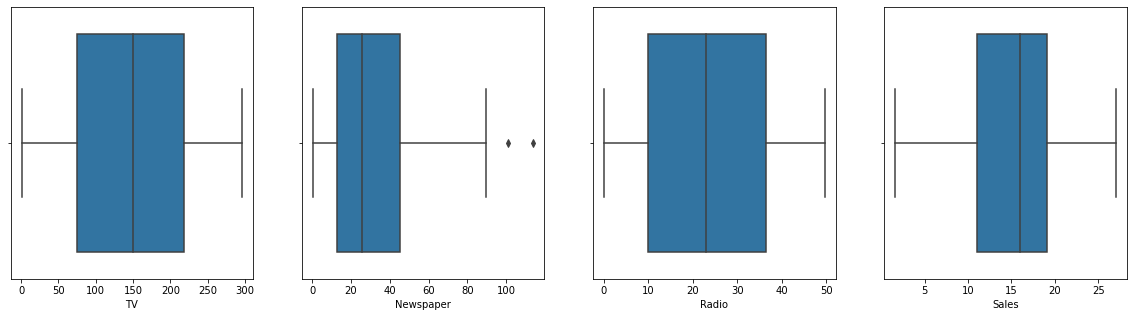

In [6]:
fig, axes = plt.subplots(ncols = 4, figsize = (20, 5))
list1 = ['TV','Newspaper','Radio', "Sales"]
for i in range(4):
    sns.boxplot(advert[list1[i]], ax = axes[i]);

### Outlier Treatment in Cost of Newspaper

Here, we try to take care of the outlier in the newspaper column using the capping and florring method, which generally involves imputing the values above by $3 * 99^{th}$ percentile and values below by $0.3 * 1^{st}$ Percentile.  However, the multiplier here may be determined intuitively considering the values of the variable or business sense generally.


In [7]:
uv = np.quantile(advert["Newspaper"], 0.99)
advert["Newspaper"][advert["Newspaper"] > uv] = round(uv, 1)
advert["Newspaper"].describe()

count    200.000000
mean      30.374500
std       21.197608
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max       89.500000
Name: Newspaper, dtype: float64

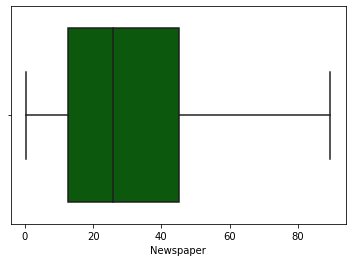

In [8]:
sns.boxplot(advert["Newspaper"], color = "darkgreen");

In [9]:
corr_matrix = advert.corr() #Correlation Matrix
corr_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.058860,0.901208
Radio,0.054809,1.000000,0.356220,0.349631
Newspaper,0.058860,0.356220,1.000000,0.160747
Sales,0.901208,0.349631,0.160747,1.000000


## Correlation Matrix
### The frame above gives the correlation matrix that shows the extent of association between any pair of the variables. The diagonal elements are always 1 because the correlation between a variable and itself is 1.
### Correlation between cost of advert on TV and Sales is about 0.9. This implies a strong positive correlation between the two variables; that is, the more money spent on TV advert, the more sales that would be realised.
### However, the correlation between cost of advert on Radio and Sales is 0.35; the correlation between cost of advert on Newspaper and Sales is 0.16. Both imply that there are weak but positive correlation between the pair of Cost of advert on Radio alongside Sales, as well as cost of advert on Newspaper alongside the Sale.

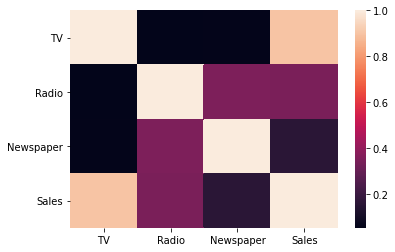

In [10]:
sns.heatmap(corr_matrix)
plt.show()

## Heat Map of Correlation Matrix

### To make the correlation matrix attractive, it is presented by the heatmap figure as seen above. The brighter the colour in each cell (intersection of a row and column), the stronger the correlation is. In the same vein, the deeper the colour of a cell, the weaker the correlation. For instance, with respect to an explanatory variable and the response variable (Sales) only, the correlation between Newspaper and Sales is seen to be in the weak region with the aid of its deep colour and the correlation scale. Also, the correlation between TV and Sales is really strong since its cell is lighter, that is, close to 1.

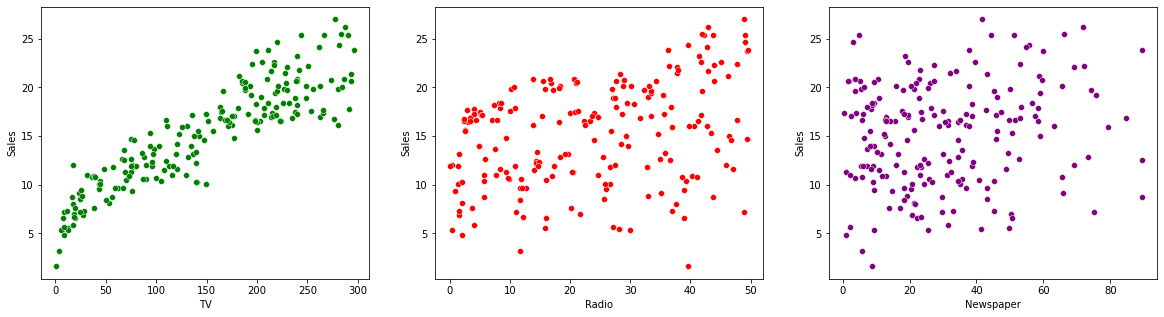

In [11]:

fig, axs = plt.subplots(ncols=3, figsize = (20, 5))
sns.scatterplot(data = advert, x = 'TV', y = 'Sales',ax=axs[0], color = "g")
sns.scatterplot(data = advert, x = 'Radio', y = 'Sales',ax=axs[1], color = "r")
sns.scatterplot(data = advert, x = 'Newspaper', y = 'Sales',ax=axs[2], color = "purple");

### The scatterplots above corrobate the previous explanation about the relationships between the individual predictor variable and the response variable. They also show that the predictor variables have a linear relationship with the response variable (sales).

### The next step represented in the cells below are to extract and print the explanatory variables (X) as well as the response variable (y).

# STAGE 4
## Extracting and Printing the Group of Variables (Explanatory & Response)

In [12]:
X = advert[['TV', 'Radio', 'Newspaper']].values
print(X)


[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6  89.5]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

In [13]:
y = advert[['Sales']].values
print(y)


[[22.1]
 [10.4]
 [12. ]
 [16.5]
 [17.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [15.6]
 [12.6]
 [17.4]
 [ 9.2]
 [13.7]
 [19. ]
 [22.4]
 [12.5]
 [24.4]
 [11.3]
 [14.6]
 [18. ]
 [17.5]
 [ 5.6]
 [20.5]
 [ 9.7]
 [17. ]
 [15. ]
 [20.9]
 [18.9]
 [10.5]
 [21.4]
 [11.9]
 [13.2]
 [17.4]
 [11.9]
 [17.8]
 [25.4]
 [14.7]
 [10.1]
 [21.5]
 [16.6]
 [17.1]
 [20.7]
 [17.9]
 [ 8.5]
 [16.1]
 [10.6]
 [23.2]
 [19.8]
 [ 9.7]
 [16.4]
 [10.7]
 [22.6]
 [21.2]
 [20.2]
 [23.7]
 [ 5.5]
 [13.2]
 [23.8]
 [18.4]
 [ 8.1]
 [24.2]
 [20.7]
 [14. ]
 [16. ]
 [11.3]
 [11. ]
 [13.4]
 [18.9]
 [22.3]
 [18.3]
 [12.4]
 [ 8.8]
 [11. ]
 [17. ]
 [ 8.7]
 [ 6.9]
 [14.2]
 [ 5.3]
 [11. ]
 [11.8]
 [17.3]
 [11.3]
 [13.6]
 [21.7]
 [20.2]
 [12. ]
 [16. ]
 [12.9]
 [16.7]
 [14. ]
 [ 7.3]
 [19.4]
 [22.2]
 [11.5]
 [16.9]
 [16.7]
 [20.5]
 [25.4]
 [17.2]
 [16.7]
 [23.8]
 [19.8]
 [19.7]
 [20.7]
 [15. ]
 [ 7.2]
 [12. ]
 [ 5.3]
 [19.8]
 [18.4]
 [21.8]
 [17.1]
 [20.9]
 [14.6]
 [12.6]
 [12.2]
 [ 9.4]
 [15.9]
 [ 6.6]
 [15.5]
 [ 7. ]
 [16.6]
 [15.2]
 [19.7]


# STAGE 5
# Dividing Dataset into Training and Testing Sets

### The cell below splits the dataset into training/testing sets. We use the test size as 20% (0.2), while the train size takes 80% (0.8).

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# STAGE 6
## Model Building and Specification

### The next cell represents developing the regression model, training the model using the training sets, as well as making predictions using the testing set.

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Now, we print the intercept and the regressors (regression coefficients), as well as the Mean Squared Error. The intercept and the regressors represent the parameters $\beta_i$ in the model. Genereally, a _multiple linear regression model_ for 3 regressors is given as
\begin{equation}
\hat{y} = \beta_0  + \beta_1  X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon 
\end{equation}

### From the values obtained, the model can be given as 
\begin{equation}
Sales = 4.7732  + 0.0537 (TV) + 0.1115 (Radio) - 0.0034 (Newspaper)
\end{equation}

In [16]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

Intercept: 
 [4.77288273]
Coefficients: 
 [[ 0.05367342  0.11147939 -0.00343957]]
Mean squared error: 4.52


# STAGE 7
## Comparison: Actual vs Predicted Values

#### The next cell shows multiple bar plot of 20 random sample from the actual testing set, alongside the predicted values.

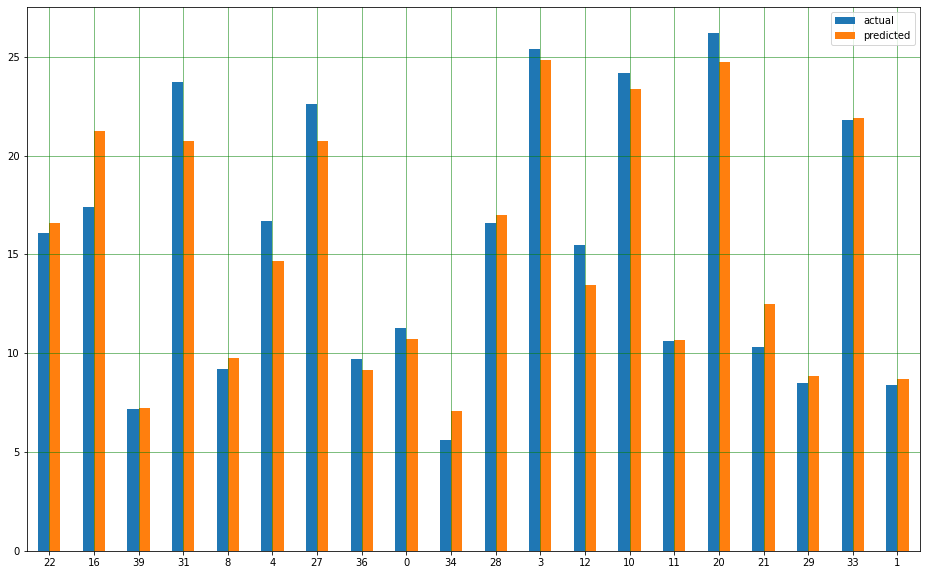

In [17]:
d = {"actual":y_test.ravel(), "predicted":y_pred.ravel()}
df1 = pd.DataFrame(d).sample(20)
df1.plot(kind='bar',figsize=(16,10), rot = 0)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

It can be seen from the multiple bar chart above that the actual values are not so many different from the predicted values for many of the observations.

In [18]:
print('Mean Absolute Error: {t:2.2f}'.format(t = mean_absolute_error(y_test, y_pred)) )  
print('Mean Squared Error: {t:2.2f}'.format(t = mean_squared_error(y_test, y_pred)))  
print('Root Mean Squared Error: {t:2.2f}'.format(t = np.sqrt(mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 1.41
Mean Squared Error: 4.52
Root Mean Squared Error: 2.13


### The cell below predicts the sale given an array that represents the costs of advertising on TV, Radio and Newspaper on 3 distinct occasions.

# STAGE 8
## Model Accuracy

#### The cell below shows the coefficient of determination. It tells the percentage of the response variable that is actually explained by the explanatory variable and also shows the level of fit of a model. 
#### A coefficient of determination of 0.86 (86%) shows that the model fits enough.

In [19]:
print("Coefficient of Multiple Determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of Multiple Determination: 0.86


# STAGE 9
## Prediction

In [20]:
from numpy.random import *
x_new=np.array([[100,2,3], [randint(1, 300) for i in range (3)], [randint(1, 300) for i in range (3)]])
print(x_new)
prediction = model.predict(x_new)
print(prediction)

[[100   2   3]
 [234  13 218]
 [ 50 241  94]]
[[10.35286484]
 [18.03186806]
 [33.99976668]]


## Summary and Conclusion 

The project entails determining a suitable model that would predict future sales (in thousands of the product) given the costs of advertising on TV, Radio and Newspaper, all in thousands of dollars. The dataset utilised for the project contains four variables: Costs of advert on TV, Radio, Newspaper, and their corresponding sales.

Correlation matrix was used to investigate the extent of relationship between a pair of explanatory variable with the response variable. The cost of advert on TV was seen to be more correlated with the sales compared to the other explanatory variables. This implies that the more money spent on TV advert, the more likely sales to be generated.

A multiple linear regression model was developed that would aid future prediction of sales given the costs of advertising on TV, Radio and Newspaper. The model was seen to be good enough for predicting sales considering that we had a coefficient of determination of $86 \%$ and a small Mean Squared Error of $4.52$.

From our analysis, we can advise the company to invest more on advertising on TV in order to generate more sales.